# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
#tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)
tweets = pd.read_csv('Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

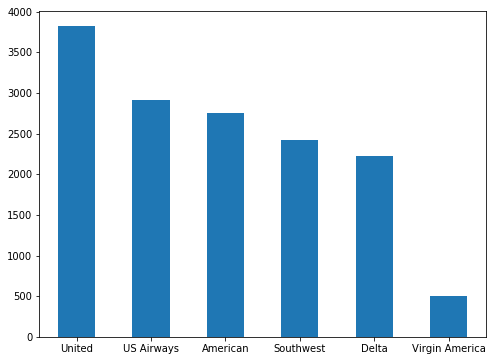

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

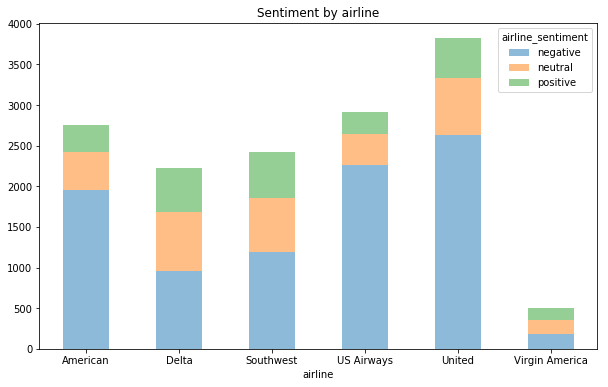

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
vect = CountVectorizer(max_features=1000)
nb = MultinomialNB()

In [10]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [11]:
tokenize_test(vect)

Features:  1000
count    10.000000
mean      0.739963
std       0.046579
min       0.648224
25%       0.721311
50%       0.731741
75%       0.766719
max       0.818306
dtype: float64


In [12]:
tf_E1 = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(tf_E1, y, test_size=0.33, random_state=42)

#### Random Forest

In [13]:
rf_E1 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)
rf_E1.fit(X_train,y_train)
ypred_E1 = rf_E1.predict(X_test)

#### Accuracy

In [14]:
metrics.accuracy_score(ypred_E1, y_test)

0.7564155629139073

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [15]:
vect_E2 = CountVectorizer(stop_words='english',max_features=1000)
tokenize_test(vect_E2)

Features:  1000
count    10.000000
mean      0.726504
std       0.048569
min       0.621585
25%       0.710675
50%       0.727304
75%       0.743809
max       0.813525
dtype: float64


In [16]:
tf_E2 = pd.DataFrame(vect_E2.fit_transform(X).toarray(), columns=vect_E2.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(tf_E2, y, test_size=0.33, random_state=42)

#### Random Forest

In [17]:
rf_E2 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)
rf_E2.fit(X_train,y_train)
ypred_E2 = rf_E2.predict(X_test)

#### Accuracy

In [18]:
metrics.accuracy_score(ypred_E2, y_test)

0.7158526490066225

# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

### With Stopword

In [19]:
vect_E3_1 = CountVectorizer(stop_words='english', ngram_range=(1, 2),max_features=1000)
tokenize_test(vect_E3_1)

Features:  1000
count    10.000000
mean      0.718856
std       0.050927
min       0.605191
25%       0.701454
50%       0.719795
75%       0.743815
max       0.797814
dtype: float64


In [20]:
tf_E3_1 = pd.DataFrame(vect_E3_1.fit_transform(X).toarray(), columns=vect_E3_1.get_feature_names())
X_train1, X_test1, y_train1, y_test1 = train_test_split(tf_E3_1, y, test_size=0.33, random_state=42)

#### Random Forest

In [21]:
rf_E3 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)
rf_E3.fit(X_train1,y_train1)
ypred_E3_1 = rf_E3.predict(X_test1)

#### Accuracy

In [22]:
metrics.accuracy_score(ypred_E3_1, y_test1)

0.7137831125827815

### Without Stopword

In [23]:
vect_E3_2 = CountVectorizer(stop_words='english', ngram_range=(1, 2),max_features=1000)
tokenize_test(vect_E3_2)

Features:  1000
count    10.000000
mean      0.718856
std       0.050927
min       0.605191
25%       0.701454
50%       0.719795
75%       0.743815
max       0.797814
dtype: float64


In [24]:
tf_E3_2 = pd.DataFrame(vect_E3_2.fit_transform(X).toarray(), columns=vect_E3_2.get_feature_names())
X_train2, X_test2, y_train2, y_test2 = train_test_split(tf_E3_2, y, test_size=0.33, random_state=42)

#### Random Forest

In [25]:
rf_E3 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)
rf_E3.fit(X_train2,y_train2)
ypred_E3_2 = rf_E3.predict(X_test2)

#### Accuracy

In [26]:
metrics.accuracy_score(ypred_E3_2, y_test2)

0.7131622516556292

# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [27]:
vect_E4 = TfidfVectorizer(stop_words='english',ngram_range=(1, 2),max_features=1000)
tokenize_test(vect_E4)

Features:  1000
count    10.000000
mean      0.724586
std       0.019411
min       0.698087
25%       0.706677
50%       0.731308
75%       0.741677
max       0.746585
dtype: float64


In [28]:
tf_E4= pd.DataFrame(vect_E4.fit_transform(X).toarray(), columns=vect_E4.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(tf_E4, y, test_size=0.33, random_state=42)

#### Random Forest

In [29]:
rf_E4 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)
rf_E4.fit(X_train,y_train)
ypred_E4 = rf_E4.predict(X_test)
metrics.accuracy_score(ypred_E4, y_test)

0.7257864238410596